# <span style='font-family:Inter Black'> Regression Coefficients Distribution

## <span style='font-family:Inter'> Regression Refresh

The theoretical linear regression of $Y$ on $X$ is the line

$x \rightarrow a^* + b^*x$ where

$$(a^*, b^*) = \underset{(a,b) \in \mathop{\mathbb{R}}^2}{\arg\max} \mathop{\mathbb{E}}[(Y − a − bX)^2]$$

minimizing we obtain:

$$a^* = \mathbb E[Y] - \frac{\textsf{Cov}(X,Y)}{\textsf{Var}(X)} \mathbb E[X], \qquad b^* = \frac{\textsf{Cov}(X,Y)}{\textsf{Var}(X)}$$

In **empirical linear regression**, we are given a collection of points ${(x_i, y_i) }_{i=1}^{n}$. The goal is to fit a linear model $Y=a+bX+\epsilon$ by computing the Least Squares Estimator, which minimizes the loss function

$$\frac{1}{n} \sum_{i=1}^ n (y_i - (a + bx_i))^2.$$

Using the same technique as in the problems on theoretical linear regression, one obtains the solution

$$\hat{a} = \overline{y} - \frac{\overline{xy} - \overline{x}\cdot \overline{y}}{\overline{x^2} - \overline{x}^2} \overline{x} \qquad \hat{b} = \frac{\overline{xy} - \overline{x}\cdot \overline{y}}{\overline{x^2} - \overline{x}^2}.$$

## <span style='font-family:Inter'> Regression Coefficients Distribution: Analysis

analytic computation of the LSE (which is also MLE) yields:

$$\hat{{\boldsymbol \beta }} = (\mathbb {X}^ T \mathbb {X})^{-1} \mathbb {X}^ T \mathbf Y.$$

And it is distributed:

$$\hat{{\boldsymbol \beta }} \sim \mathcal{N}(\beta , \sigma ^2 (\mathbb {X}^ T \mathbb {X})^{-1}).$$

$Y$ is distributed:

$$Y∼N(X^{T}β,σ^2I_{n})$$

And, for instance, in the one dimensional case, if we assume that $ε∼N(0,σ^2I_{1000})$ for some fixed $σ^2$, so that $Y∼N(Xβ,σ^2I_{1000})$. The quadratic risk of $\hat{β}$ and the prediction error are respectively:

$$\mathbb E[| \hat{{\boldsymbol \beta }} - {\boldsymbol \beta }|_2^2 = \sigma^2 \mathrm{tr}((\mathbb {X}^ T\mathbb {X})^{-1})$$

$$\mathbb E[ | \mathbf Y- \mathbb {X}\hat{{\boldsymbol \beta }} |_2^2 ] = \sigma^2(n-p)$$

$tr$ means_ "trace" and it is the sum of all the diagonal entries.

___


Test whether the j-th explanatory variable is significant in the linear regression.
- $H_0: \beta_j = 0$ vs $H_1: \beta_j \neq 0$ 
- If $\gamma_i$ " is the j-th diagonal coefficient of $\hat{{\boldsymbol \beta }} = (\mathbb {X}^ T \mathbb {X})^{-1} \mathbb {X}^ T \mathbf Y.$

with $(\gamma_j > 0)$

$${\displaystyle \frac{\widehat{\beta_j} - \beta_j}{\sqrt{\hat{\sigma^2} \gamma^2}} \sim t_{n-p}, }$$

In a bivariate linear regression:

$${\displaystyle t={\frac {{\widehat {\beta }}-\beta }{s_{\widehat {\beta }}}}\ \sim \ t_{n-2},}$$

where

$${\displaystyle s_{\widehat {\beta }}={\sqrt {\frac {{\frac {1}{n-2}}\sum _{i=1}^{n}{\widehat {\varepsilon }}_{i}^{\,2}}{\sum _{i=1}^{n}(x_{i}-{\bar {x}})^{2}}}}}$$

and $\gamma_j = {\sum _{i=1}^{n}(x_{i}-{\bar {x}})^{2}}$

[link](https://stats.stackexchange.com/questions/117406/proof-that-the-coefficients-in-an-ols-model-follow-a-t-distribution-with-n-k-d)

___

Let's make an example with $10$ data points of two independent normal random variables, with an $\mathop{\mathbb{E}}[{\beta}] = 0$.

Which values can $\beta$ take?

In [2]:
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from primitive import r_squared_distribution, distributions

In [3]:
n_samples = 50000
n_data_points = 6
k = 1
dof = n_data_points - 2

In [4]:
samples = np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], size=(n_samples, n_data_points))

In [5]:
b1_dict = {}
b0_dict = {}
var_est = {}
se_dict = {}
for cnt, sample in enumerate(samples):
    X = sample[:,0]
    y = sample[:,1]
    X = sm.add_constant(X)
    res = sm.OLS(y, X).fit()
    b0 = res.params[0]
    b1 = res.params[1]
    b0_dict[cnt] = b0
    b1_dict[cnt] = b1
    se_dict[cnt] = res.bse[1]  # standard error of the beta coefficient
    # np.sqrt((sum((y - (X[:,1] * b1 + b0))**2)/(n-2)) / sum((X[:, 1]-np.mean(X[:, 1]))**2)) =  res.bse[1]
     

In [6]:
beta_dist = pd.Series(b1_dict)
beta_dist_n = beta_dist / pd.Series(se_dict)

In [7]:
threshold = -2
from scipy.stats import t as student_t
cum_prob = len(beta_dist_n[beta_dist_n < threshold]) / len(beta_dist_n)
cum_prob_theory = round(student_t.cdf(threshold, df=dof), 4)

print(cum_prob, "(data cumulative probability %s)" % str(threshold))
print(cum_prob_theory, "(theoretical cumulative probability at %s)"% str(threshold))

0.05816 (data cumulative probability -2)
0.0581 (theoretical cumulative probability at -2)


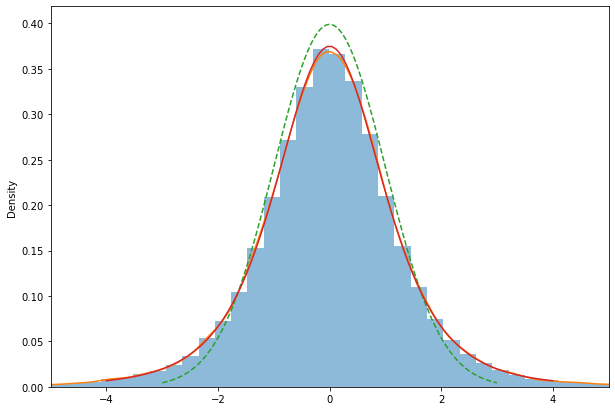

In [8]:
# -----

plt.figure(figsize=(10, 7))
plt.hist(beta_dist_n, density=True, bins=150, alpha=0.5)
beta_dist_n.plot.kde()

# -----

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
plt.plot(x, stats.norm.pdf(x, mu, sigma), linestyle='--')


# -----

from scipy.stats import t as student_t

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
dist = student_t(dof, 0)
plt.plot(x, dist.pdf(x))
plt.xlim([-5, 5])
plt.show()

## <span style='font-family:Inter'> R-Squared Coefficients Distribution Code</span>

Distribution of the R-squared of independent rvs  

In [9]:
def distributions(f, **kwargs):
    return f(**kwargs) 

def r_squared_distribution(f, X_params, y_params):
    r_squared_dict = {}
    for i in np.arange(0, 10000, 1):
        df = pd.DataFrame(distributions(f, **X_params))
        s = pd.Series(distributions(f, **y_params))
        result = OLS(endog=s, exog=df).fit()
        r_squared_dict[i] = result.rsquared
    
    return pd.Series(r_squared_dict)

In [10]:
from statsmodels.regression.linear_model import OLS
n_features = 10
n_samples = 60

In [11]:
mu = 0.0
sigma = 0.001
normal_params_X = {'loc': mu, 'scale': sigma, 'size': [n_samples, n_features]}
normal_params_y = {'loc': mu, 'scale': sigma, 'size': n_samples}
rsq_s_normal = r_squared_distribution(np.random.normal, normal_params_X, normal_params_y)

In [12]:
dof = 1
tstud_params_X = {'df': dof, 'size': [n_samples, n_features]}
tstud_params_y = {'df': dof, 'size': n_samples}
rsq_s_tstud = r_squared_distribution(np.random.standard_t, tstud_params_X, tstud_params_y)

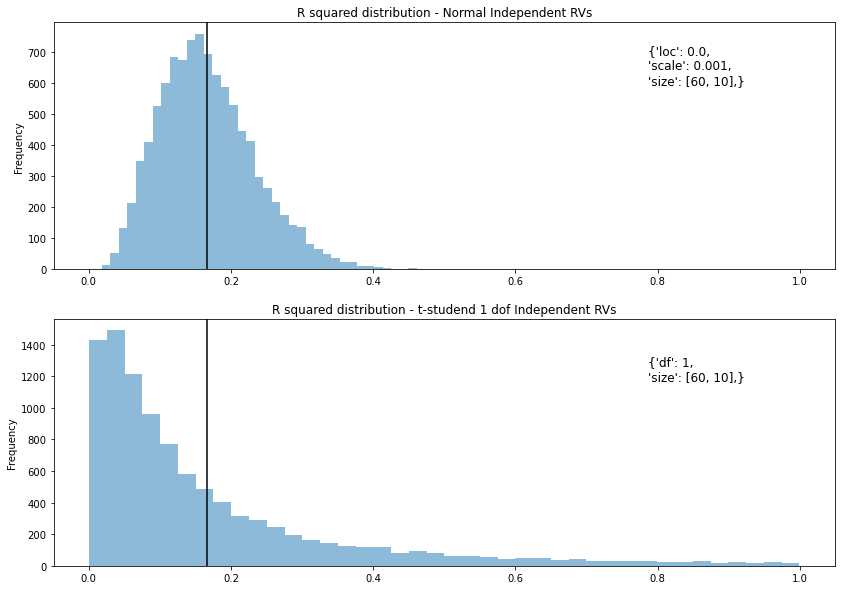

In [13]:
fig = plt.figure(figsize=(14, 10))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

rsq_s_normal.plot(kind='hist', bins=40, ax=ax1, alpha=0.5)
rsq_s_tstud.plot(kind='hist', bins=40, ax=ax2, alpha=0.5)

ax1.axvline(rsq_s_normal.mean(), color='black')
ax2.axvline(rsq_s_tstud.mean(), color='black')

limits = ((min([ax1.get_xlim()[0], ax2.get_xlim()[0]])), max([ax1.get_xlim()[1], ax2.get_xlim()[1]]))
ax1.set_xlim(limits[0], limits[1])
ax2.set_xlim(limits[0], limits[1])
ax1.set_title('R squared distribution - Normal Independent RVs')
ax2.set_title('R squared distribution - t-studend {} dof Independent RVs'.format(str(dof)))

ax2.text(ax2.get_xlim()[1]*0.75, ax2.get_ylim()[1]*0.75, "{" + "\n".join("{!r}: {!r},".format(k, v) for k, v in tstud_params_X.items()) + "}", fontsize=12)
ax1.text(ax1.get_xlim()[1]*0.75, ax1.get_ylim()[1]*0.75, "{" + "\n".join("{!r}: {!r},".format(k, v) for k, v in normal_params_X.items()) + "}", fontsize=12)

plt.show()